In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [ ]:
data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.columns = ['ID','Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size',
                'Bare Nuclei','Bland Chromatin','Normal Nucleoli',
                'Mitoses','Class']

In [ ]:
# Attribute Information: 

#    #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)

In [ ]:
data.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [ ]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('float64')

ValueError: ignored

In [ ]:
data['Bare Nuclei'].value_counts()

1      402
10     132
2       30
5       30
3       28
8       21
4       19
1.0     16
9        9
7        8
6        4
Name: Bare Nuclei, dtype: int64

In [ ]:
data['Bare Nuclei'].isnull().sum()

0

In [ ]:
# 1. Replace data yang memiliki simbol '?' dengan nilai null/nan
data = data.replace('?', np.nan)

In [ ]:
# 2. Isi data yang hilang dengan nilai median Bare Nuclei
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

In [ ]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

### Modeling

In [ ]:
#pisah menjadi train dan test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
target = data['Class']
features = data.drop(['Class', 'ID'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=10)

In [ ]:
#Modelling
from sklearn.svm import SVC

#### Use Linear Kernel

In [ ]:
# Building model from dataset
svc_linear = SVC(C=0.1, kernel='linear')
svc_linear.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
# Prediksi/testing

svc_predict = svc_linear.predict(x_test)

In [ ]:
train_score = svc_linear.score(x_train, y_train)
test_score = svc_linear.score(x_test,y_test)

In [ ]:
print(train_score)
print(test_score)

0.9749552772808586
0.9642857142857143


#### Polynomial Kernel

In [ ]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train,y_train)

poly_predict = svc_poly.predict(x_test)

train_poly_score = svc_poly.score(x_train, y_train)
test_poly_score = svc_poly.score(x_test,y_test)

print(train_poly_score)
print(test_poly_score)

0.9785330948121646
0.9571428571428572


#### RBF Kernel

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)

rbf_predict = svc_rbf.predict(x_test)

train_rbf_score = svc_rbf.score(x_train, y_train)
test_rbf_score = svc_rbf.score(x_test,rbf_predict)

print(train_rbf_score)
print(test_rbf_score)

0.9785330948121646
1.0


In [ ]:
rbf_predict

array([4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 2, 4, 2, 4, 2, 2, 2])

In [ ]:
x_test

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
285,8,10,10,10,8,10,10,7,3
607,1,1,1,1,2,1,1,1,1
587,5,1,1,1,2,1,2,2,1
458,5,1,2,1,2,1,1,1,1
431,5,1,1,3,4,1,3,2,1
...,...,...,...,...,...,...,...,...,...
76,1,1,4,1,2,1,2,1,1
183,5,8,8,8,5,10,7,8,1
429,2,1,1,1,2,1,2,1,1
495,3,1,1,1,1,1,2,1,1


In [ ]:
svc_linear.support_vectors_

array([[ 5.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 8.,  3.,  3.,  1.,  2.,  2.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  5.,  5.,  1.,  1.],
       [ 5.,  3.,  4.,  3.,  4.,  5.,  4.,  7.,  1.],
       [ 6.,  2.,  1.,  1.,  1.,  1.,  7.,  1.,  1.],
       [ 5.,  4.,  5.,  1.,  8.,  1.,  3.,  6.,  1.],
       [ 6.,  3.,  3.,  3.,  3.,  2.,  6.,  1.,  1.],
       [ 7.,  1.,  2.,  3.,  2.,  1.,  2.,  1.,  1.],
       [ 4.,  6.,  5.,  6.,  7.,  1.,  4.,  9.,  1.],
       [ 3.,  4.,  5.,  3.,  7.,  3.,  4.,  6.,  1.],
       [ 5.,  1.,  2., 10.,  4.,  5.,  2.,  1.,  1.],
       [ 3.,  3.,  2.,  6.,  3.,  3.,  3.,  5.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  3.,  1.,  1.,  2.,  1.,  4.,  8.,  1.],
       [ 4.,  4.,  4.,  4.,  6.,  5.,  7.,  3.,  1.],
       [ 6.,  9.,  7.,  5.,  5.,  8.,  4.,  2.,  1.],
       [ 8.,  4.,  6.,  3.,  3.,  1.,  4.,  3.,  1.],
       [ 4.,  4.,  4.,  2., 

## Another Example - Dataset IRIS

In [ ]:
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


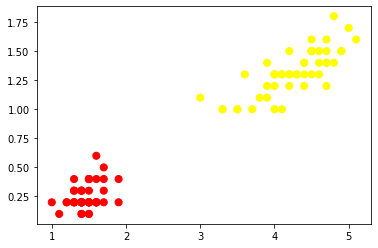

In [ ]:
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]
y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

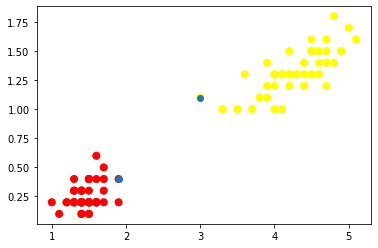

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

In [ ]:
model.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


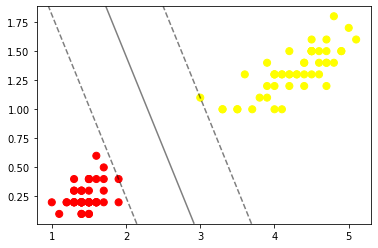

In [ ]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])